In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from scipy.special import softmax


from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
import pickle

In [23]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.ticker as ticker
import locale

locale.setlocale(locale.LC_ALL, 'de_DE')

plt.rcParams["font.family"] = 'Djvu Serif'

plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.unicode'] = True

plt.rcParams['text.latex.preamble'] = [r'\usepackage[utf8x]{inputenc}', 
                                       r'\usepackage[english,russian]{babel}', 
                                       r'\usepackage{amsmath}']

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

plt.rcParams['axes.formatter.use_locale'] = True

In [24]:
from src.synthetic import (train_student_without_teacher, 
                           train_student_with_teacher, 
                           Student)

# Генерация выборки

In [25]:
m_train = 1000
m_test = 1000
n = 10
K = 3
np.random.seed(0)

w = np.random.randn(n, K)

X_train = np.random.randn(m_train, n)

v_real = softmax(X_train@w, axis = 1)
y = []
for v in v_real:
    y.append(np.random.choice([0, 1, 2], p = v))
y_train = np.array(y)


X_test = np.random.randn(m_test, n)

v_real = softmax(X_test@w, axis = 1)
y = []
for v in v_real:
    y.append(np.random.choice([0, 1, 2], p = v))
y_test = np.array(y)

X_train_tr = torch.tensor(X_train).float()
X_test_tr = torch.tensor(X_test).float()

y_train_tr = torch.tensor(y_train).long()
y_test_tr = torch.tensor(y_test).long()

train_data = TensorDataset(X_train_tr, y_train_tr)

test_data = TensorDataset(X_test_tr, y_test_tr)

# Без учителя

In [26]:
# DICT = train_student_without_teacher(train_data, test_data)


In [27]:
# with open('../dumps/synthetic/train_student_without_teacher.pkl', 'wb') as f:
#     pickle.dump(DICT, f)

In [28]:
with open('../dumps/synthetic/train_student_without_teacher.pkl', 'rb') as f:
    DICT = pickle.load(f)

In [29]:
list_of_student_models = DICT['list_of_student_models']
list_of_losses_train = DICT['list_of_losses_train']
list_of_losses_test = DICT['list_of_losses_test']
list_of_acc_train = DICT['list_of_acc_train']
list_of_acc_test = DICT['list_of_acc_test']

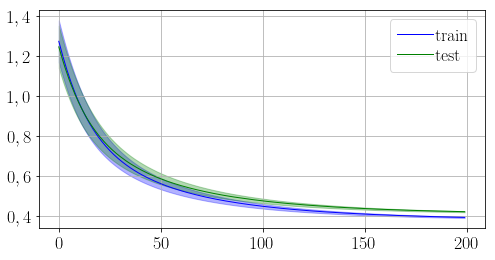

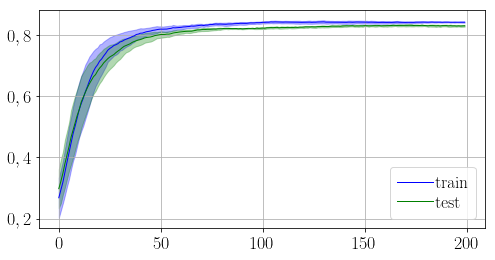

In [30]:
Text_size = 18

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################


mean = np.array(list_of_losses_train).mean(0)
std = np.array(list_of_losses_train).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'blue', label = 'train')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'blue')


mean = np.array(list_of_losses_test).mean(0)
std = np.array(list_of_losses_test).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'green', label = 'test')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'green')


plt.grid()
plt.legend(loc='best')
plt.show()


mean = np.array(list_of_acc_train).mean(0)
std = np.array(list_of_acc_train).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'blue', label = 'train')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'blue')


mean = np.array(list_of_acc_test).mean(0)
std = np.array(list_of_acc_test).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'green', label = 'test')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'green')


plt.grid()
plt.legend(loc='best')
plt.show()

In [31]:
student = list_of_student_models[-1]

testloader = DataLoader(test_data, batch_size=64, shuffle=False)
predicts = []
for x, y in testloader:
    predict = torch.softmax(student(x), -1).detach().numpy()
    predicts += predict.tolist()
    
predict = np.array(predicts)
print('CrossEntropyLoss', np.array(list_of_losses_test).mean(0)[-1], np.array(list_of_losses_test).std(0)[-1])
print('Accuracy', np.array(list_of_acc_test).mean(0)[-1], np.array(list_of_acc_test).std(0)[-1])
print('MAX-MIN', (predict.max(-1) - predict.min(-1)).mean(), (predict.max(-1) - predict.min(-1)).std()) 


CrossEntropyLoss 0.4224151691436767 0.0025952799330848653
Accuracy 0.8308 0.002785677655436826
MAX-MIN 0.7527142599958802 0.21810800662833144


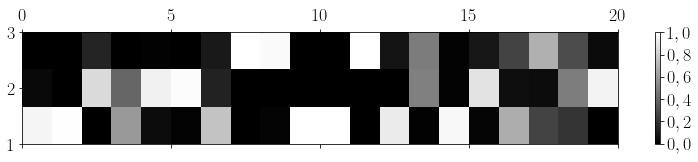

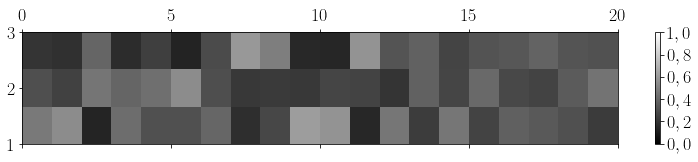

In [32]:
Text_size = 18

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (4, 2)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################


student = list_of_student_models[-1]

list_of_predict = []
testloader = DataLoader(test_data, batch_size=64, shuffle=False)
for x, y in testloader:
    predict = torch.softmax(student(x), -1).detach().numpy()
    list_of_predict.extend(predict)
list_of_predict = np.array(list_of_predict)

v_real = softmax(X_test@w/10, axis = 1)

im = plt.matshow(list_of_predict[:20].T, 
                 cmap='gray', 
                 interpolation='none', 
                 extent=[0, 20, 1, 3], 
                 aspect="auto",
                 vmin=0.0, vmax=1.0)

_ = plt.colorbar(im)

plt.show()


im = plt.matshow(v_real[:20].T, 
                 cmap='gray', 
                 interpolation='none', 
                 extent=[0, 20, 1, 3], 
                 aspect="auto",
                 vmin=0.0, vmax=1.0)
_ = plt.colorbar(im)

plt.show()

In [33]:
print('RealCrossEntropy', 
      -1*(v_real[:40]*np.log(predict[:40])).sum(-1).mean(), 
      (v_real[:40]*np.log(predict[:40])).sum(-1).std())

RealCrossEntropy 2.6351173631094964 1.2125140310377263


# С учителем

In [13]:
# DICT = train_student_with_teacher(train_data, test_data, X_train, w, epochs=200, meaning=5, T=10, lamb=0.75)

In [14]:
# with open('../dumps/synthetic/train_student_with_teacher.pkl', 'wb') as f:
#     pickle.dump(DICT, f)

In [15]:
with open('../dumps/synthetic/train_student_with_teacher.pkl', 'rb') as f:
    DICT = pickle.load(f)

In [16]:
list_of_student_models_dist = DICT['list_of_student_models_dist']
list_of_losses_train_dist = DICT['list_of_losses_train_dist']
list_of_losses_test_dist = DICT['list_of_losses_test_dist']
list_of_acc_train_dist = DICT['list_of_acc_train_dist']
list_of_acc_test_dist = DICT['list_of_acc_test_dist']

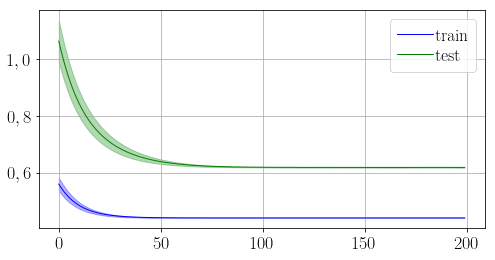

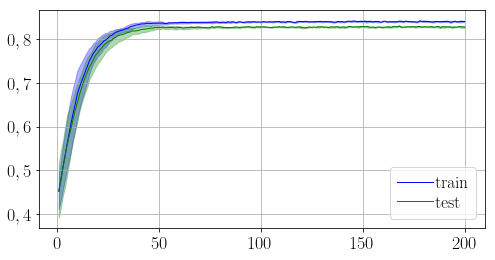

In [17]:
Text_size = 18

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################

mean = np.array(list_of_losses_train_dist).mean(0)
std = np.array(list_of_losses_train_dist).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'blue', label = 'train')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'blue')


mean = np.array(list_of_losses_test_dist).mean(0)
std = np.array(list_of_losses_test_dist).std(0)
x_axis = np.arange(0, len(mean))

plt.plot(x_axis, mean, color = 'green', label = 'test')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'green')


plt.grid()
plt.legend(loc='best')
plt.show()

mean = np.array(list_of_acc_train_dist).mean(0)
std = np.array(list_of_acc_train_dist).std(0)
x_axis = np.arange(1, len(mean)+1)

plt.plot(x_axis, mean, color = 'blue', label = 'train')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'blue')


mean = np.array(list_of_acc_test_dist).mean(0)
std = np.array(list_of_acc_test_dist).std(0)
x_axis = np.arange(1, len(mean)+1)

plt.plot(x_axis, mean, color = 'green', label = 'test')
plt.fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'green')


plt.grid()
plt.legend(loc='best')
plt.show()

In [18]:
student = list_of_student_models_dist[-1]

testloader = DataLoader(test_data, batch_size=64, shuffle=False)
predicts = []
for x, y in testloader:
    predict = torch.softmax(student(x), -1).detach().numpy()
    predicts += predict.tolist()
    
predict = np.array(predicts)
print('CrossEntropyLoss', np.array(list_of_losses_test_dist).mean(0)[-1], np.array(list_of_losses_test_dist).std(0)[-1])
print('Accuracy', np.array(list_of_acc_test_dist).mean(0)[-1], np.array(list_of_acc_test_dist).std(0)[-1])
print('MAX-MIN', (predict.max(-1) - predict.min(-1)).mean(), (predict.max(-1) - predict.min(-1)).std()) 


CrossEntropyLoss 0.6184855889320373 0.00011306798758895119
Accuracy 0.828 0.00244948974278318
MAX-MIN 0.44855606638174506 0.20284910988405855


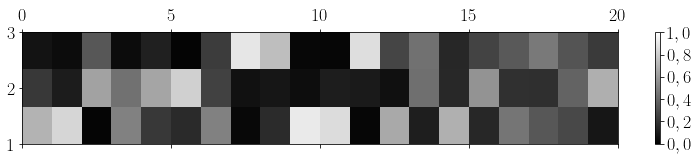

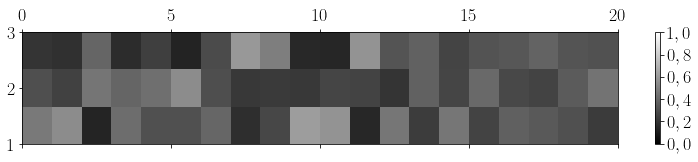

In [15]:
Text_size = 18

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (4, 2)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################


student = list_of_student_models_dist[-1]

list_of_predict = []
testloader = DataLoader(test_data, batch_size=64, shuffle=False)
for x, y in testloader:
    predict = torch.softmax(student(x), -1).detach().numpy()
    list_of_predict.extend(predict)
list_of_predict = np.array(list_of_predict)

v_real = softmax(X_test@w/10, axis = 1)

im = plt.matshow(list_of_predict[:20].T, 
                 cmap='gray', 
                 interpolation='none', 
                 extent=[0, 20, 1, 3], 
                 aspect="auto",
                 vmin=0.0, vmax=1.0)

_ = plt.colorbar(im)

plt.show()


im = plt.matshow(v_real[:20].T, 
                 cmap='gray', 
                 interpolation='none', 
                 extent=[0, 20, 1, 3], 
                 aspect="auto",
                 vmin=0.0, vmax=1.0)
_ = plt.colorbar(im)

plt.show()

In [21]:
print('RealCrossEntropy', -1*(v_real[:40]*np.log(predict[:40])).sum(-1).mean(), (v_real[:40]*np.log(predict[:40])).sum(-1).std())


RealCrossEntropy 1.1696432847375013 0.04763793186045055


# Экперимент, где T и $\lambda$ это параметры

In [17]:
DICT = dict()

for T in tqdm([0.25, 0.5, 1, 2, 4, 8]):
    DICT[T] = dict()
    for lamb in tqdm([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
        DICT[T][lamb] = dict()
        S = softmax(X_train@w/T, axis = 1)

        S_tr = torch.tensor(S)

        all_train_data = TensorDataset(X_train_tr, y_train_tr, S_tr)

        list_of_predicts_dist = []
        list_of_student_models_dist = []
        list_of_acc_train_dist = []
        list_of_acc_test_dist = []
        list_of_losses_train_dist = []
        list_of_losses_test_dist = []



        for tryes in tqdm(range(meaning), leave=False):

            student = Student()

            optimazir = optim.Adam(student.parameters())
            loss_function = torch.nn.CrossEntropyLoss()

            iterator = tqdm(range(epochs), leave=False)
            iterator.set_postfix_str('epoch 0; loss: train nan test nan; acc: train nan test nan')

            list_of_predicts= []
            list_of_train_loss = []
            list_of_test_loss = []
            list_of_train_acc = []
            list_of_test_acc = []

            for i in iterator:
                dataloader = DataLoader(all_train_data, batch_size=64, shuffle=True)

                epoch_loss = 0
                epoch_true = 0
                for x, y, s in dataloader:
                    optimazir.zero_grad()

                    predict = student(x)
                    log_soft_pred = torch.log(torch.softmax(predict, axis=1))

                    loss = (1-lamb)*loss_function(predict, y) \
                                     - lamb*(s*log_soft_pred).mean() \
        #                              - lamb*(log_soft_pred + torch.log(-log_soft_pred)).mean()

                    loss.backward()

                    optimazir.step()

                    epoch_loss += loss.item()*len(y)

                    epoch_true += (torch.argmax(predict, axis=1) == y).sum().item()

                testloader = DataLoader(test_data, batch_size=64, shuffle=False)
                test_loss = 0
                test_true = 0
                for x, y in testloader:
                    predict = student(x)
                    loss = loss_function(predict, y)
                    test_loss += loss.item()*len(y)

                    test_true += (torch.argmax(predict, axis=1) == y).sum().item()
                    
                    
                list_of_predict = []
                testloader = DataLoader(test_data, batch_size=64, shuffle=False)
                for x, y in testloader:
                    predict = torch.softmax(student(x), -1).detach().numpy()
                    list_of_predict.extend(predict)
                list_of_predict = np.array(list_of_predict)
                
                list_of_predicts.append(list_of_predict)

                list_of_train_loss.append(epoch_loss/len(train_data))
                list_of_test_loss.append(test_loss/len(test_data))

                list_of_train_acc.append(epoch_true/len(train_data))
                list_of_test_acc.append(test_true/len(test_data))

                iterator.set_postfix_str(
                    'epoch {}; loss: train {} test {}; acc: train {} test {}'.format(
                        i, 
                        round(list_of_train_loss[-1], 2), 
                        round(list_of_test_loss[-1], 2), 
                        round(list_of_train_acc[-1], 2), 
                        round(list_of_test_acc[-1], 2)))

            list_of_losses_train_dist.append(list_of_train_loss)
            list_of_losses_test_dist.append(list_of_test_loss)

            list_of_acc_train_dist.append(list_of_train_acc)
            list_of_acc_test_dist.append(list_of_test_acc)

            list_of_student_models_dist.append(student)
            
            list_of_predicts_dist.append(list_of_predicts)
            
            
        DICT[T][lamb]['list_of_losses_train_dist'] = list_of_losses_train_dist
        DICT[T][lamb]['list_of_losses_test_dist'] = list_of_losses_test_dist
        DICT[T][lamb]['list_of_acc_train_dist'] = list_of_acc_train_dist
        DICT[T][lamb]['list_of_acc_test_dist'] = list_of_acc_test_dist
        DICT[T][lamb]['list_of_student_models_dist'] = list_of_student_models_dist
        DICT[T][lamb]['list_of_predicts_dist'] = list_of_predicts_dist

In [18]:
# with open('../dumps/synthetic/DICT.pkl', 'wb') as f:
#     pickle.dump(DICT, f)

In [19]:
# with open('../dumps/synthetic/DICT.pkl', 'rb') as f:
#     DICT = pickle.load(f)

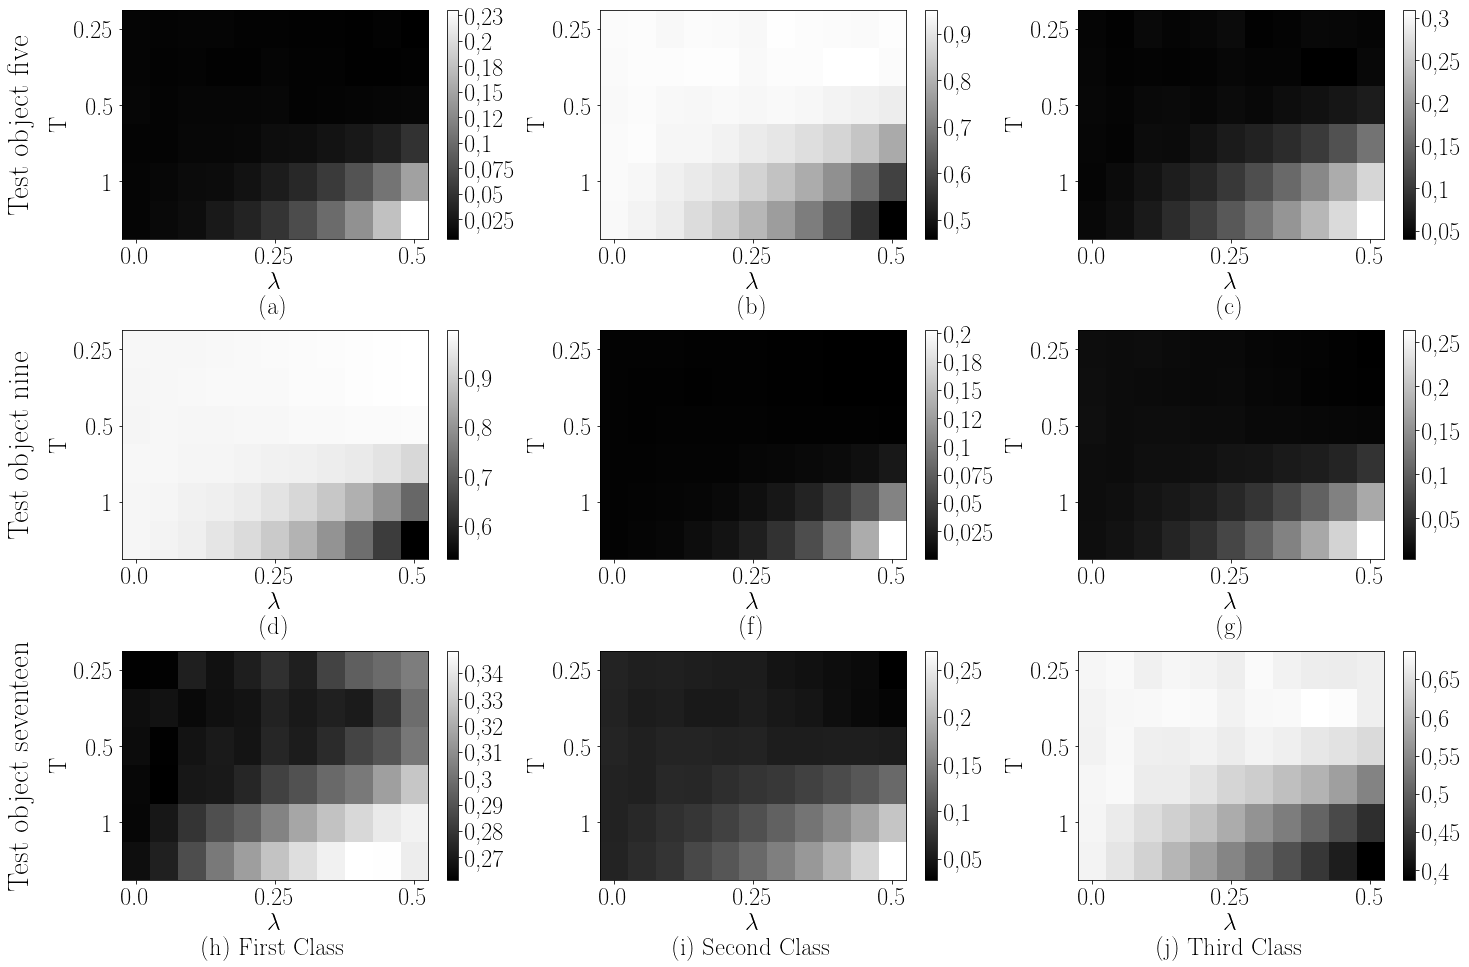

In [20]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24, 16)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################

fig = plt.figure()

gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1])

cols = ['First Class', 'Second Class', 'Third Class']
    
rows = ['Test object five', 'Test object nine', 'Test object seventeen']

ax = []
for i in range(9):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.3n}'))
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2n}'))
    
    if i % 3 == 0:
        ax[-1].annotate(rows[i//3], xy=(0, 0.5), xytext=(-ax[i].yaxis.labelpad - 24, 0),
                        xycoords=ax[i].yaxis.label, textcoords='offset points',
                        size='large', ha='center', va='center', rotation=90)
        
    

TITLES = [['(a)', '(b)', '(c)'], ['(d)', '(f)', '(g)'], ['(h)', '(i)', '(j)']]


for i, object_num in enumerate([4, 8, 16]):
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 0]

    # ax = plt.gca()
    im = ax[3*i+0].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+0], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+0].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+0].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+0].set_title(TITLES[i][0] + ' ' + cols[0], y=-0.35)
    else:
        ax[3*i+0].set_title(TITLES[i][0], y=-0.35)
    
    ax[3*i+0].set_ylabel('T')
    ax[3*i+0].set_xlabel('$\lambda$')

    # Second class
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 1]

    # ax = plt.gca()
    im = ax[3*i+1].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+1], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+1].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+1].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+1].set_title(TITLES[i][1] + ' ' + cols[1], y=-0.35)
    else:
        ax[3*i+1].set_title(TITLES[i][1], y=-0.35)
    
    ax[3*i+1].set_ylabel('T')
    ax[3*i+1].set_xlabel('$\lambda$')

    # Third class
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 2]

    # ax = plt.gca()
    im = ax[3*i+2].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+2], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+2].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+2].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+2].set_title(TITLES[i][2] + ' ' + cols[2], y=-0.35)
    else:
        ax[3*i+2].set_title(TITLES[i][2], y=-0.35)
    
    ax[3*i+2].set_ylabel('T')
    ax[3*i+2].set_xlabel('$\lambda$')
    
plt.subplots_adjust(wspace=0.25, hspace=0.4)

plt.show()